In [1]:
!wget -O wesad_dataset.zip "https://uni-siegen.sciebo.de/s/HGdUkoNlW1Ub0Gx/download"
!unzip wesad_dataset.zip -d wesad_data

--2025-05-09 14:57:59--  https://uni-siegen.sciebo.de/s/HGdUkoNlW1Ub0Gx/download
Resolving uni-siegen.sciebo.de (uni-siegen.sciebo.de)... 128.176.1.2
Connecting to uni-siegen.sciebo.de (uni-siegen.sciebo.de)|128.176.1.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2249444501 (2.1G) [application/zip]
Saving to: ‘wesad_dataset.zip’

wesad_dataset.zip   100%[===================>]   2.09G  25.3MB/s    in 89s     

2025-05-09 14:59:29 (24.1 MB/s) - ‘wesad_dataset.zip’ saved [2249444501/2249444501]

Archive:  wesad_dataset.zip
   creating: wesad_data/WESAD/
   creating: wesad_data/WESAD/S10/
  inflating: wesad_data/WESAD/S10/S10.pkl  
  inflating: wesad_data/WESAD/S10/S10_E4_Data.zip  
  inflating: wesad_data/WESAD/S10/S10_quest.csv  
  inflating: wesad_data/WESAD/S10/S10_readme.txt  
  inflating: wesad_data/WESAD/S10/S10_respiban.txt  
   creating: wesad_data/WESAD/S11/
  inflating: wesad_data/WESAD/S11/S11.pkl  
  inflating: wesad_data/WESAD/S11/S11_E4_Data.zip

In [2]:
import pickle
import numpy as np
import pandas as pd

In [3]:
s2= pd.read_pickle("/content/wesad_data/WESAD/S2/S2.pkl")
s2

{'signal': {'chest': {'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
          [ 0.92579997, -0.2216    , -0.55379999],
          [ 0.90820003, -0.21960002, -0.53920001],
          ...,
          [ 0.87179995, -0.12379998, -0.30419999],
          [ 0.87300003, -0.12339997, -0.30260003],
          [ 0.87020004, -0.12199998, -0.30220002]]),
   'ECG': array([[ 0.02142334],
          [ 0.02032471],
          [ 0.01652527],
          ...,
          [-0.00544739],
          [ 0.00013733],
          [ 0.0040741 ]]),
   'EMG': array([[-0.00444031],
          [ 0.00434875],
          [ 0.00517273],
          ...,
          [-0.01716614],
          [-0.02897644],
          [-0.02357483]]),
   'EDA': array([[5.25054932],
          [5.26733398],
          [5.24330139],
          ...,
          [0.36048889],
          [0.36582947],
          [0.365448  ]]),
   'Temp': array([[30.120758],
          [30.129517],
          [30.138214],
          ...,
          [31.459229],
          [31.484283

In [4]:
s17= pd.read_pickle("/content/wesad_data/WESAD/S17/S17.pkl")
s17

{'signal': {'chest': {'ACC': array([[ 0.70019996, -0.19819999, -1.07019997],
          [ 0.72940004, -0.19019997, -1.04700005],
          [ 0.76460004, -0.18400002, -1.00460005],
          ...,
          [ 0.90279996, -0.0424    , -0.1864    ],
          [ 0.90020001, -0.04079998, -0.18540001],
          [ 0.89960003, -0.04140002, -0.18620002]]),
   'ECG': array([[1.43179321],
          [1.46195984],
          [1.47161865],
          ...,
          [0.16712952],
          [0.17033386],
          [0.17523193]]),
   'EMG': array([[ 0.00709534],
          [-0.0124054 ],
          [-0.01808167],
          ...,
          [-0.0160675 ],
          [ 0.00517273],
          [ 0.02275085]]),
   'EDA': array([[5.40046692],
          [5.40885925],
          [5.40161133],
          ...,
          [7.26280212],
          [7.26966858],
          [7.2681427 ]]),
   'Temp': array([[32.415283],
          [32.43463 ],
          [32.4451  ],
          ...,
          [33.86429 ],
          [33.862762],
   

In [5]:
def slicing(setion,sgnl):
    data = pd.DataFrame(setion['signal'])
    datad=data['chest']
    signal=datad[sgnl]
    signal=pd.DataFrame(signal)
    return signal

In [6]:
ECG2=slicing(s2,'ECG')
ECG17=slicing(s17,'ECG')

In [7]:
label2=pd.DataFrame(s2['label'])
label17=pd.DataFrame(s17['label'])

In [8]:
ECGS=pd.concat([ECG2, ECG17], axis=0)
labels=pd.concat([label2, label17], axis=0)


In [9]:
df=pd.concat([ECGS,labels], axis=1)
df.columns = ["ECG Signal", "Labels"]
df

,ECG Signal,Labels
0,0.021423,0
1,0.020325,0
2,0.016525,0
3,0.016708,0
4,0.011673,0
...,...,...
4143995,0.173676,0
4143996,0.168777,0
4143997,0.167130,0
4143998,0.170334,0


In [10]:
df['Labels'].value_counts()

,count
Labels,
0,4060002
1,1627500
4,1049299
2,936600
3,513800
6,86799
7,84700
5,40600


In [11]:
col = 'ECG Signal'
print(df[col].max())
print(df[col].min())

1.4999542236328125
-1.499542236328125


In [12]:
zero_counts = (df == 0).sum()
zero_counts

,0
ECG Signal,715
Labels,4060002


In [13]:
# prompt: remove ecg sihnal =0

df= df[df['ECG Signal'] != 0]
df


,ECG Signal,Labels
0,0.021423,0
1,0.020325,0
2,0.016525,0
3,0.016708,0
4,0.011673,0
...,...,...
4143995,0.173676,0
4143996,0.168777,0
4143997,0.167130,0
4143998,0.170334,0


In [14]:
df['Labels'].value_counts()

,count
Labels,
0,4059645
1,1627386
4,1049195
2,936538
3,513741
6,86792
7,84692
5,40596


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

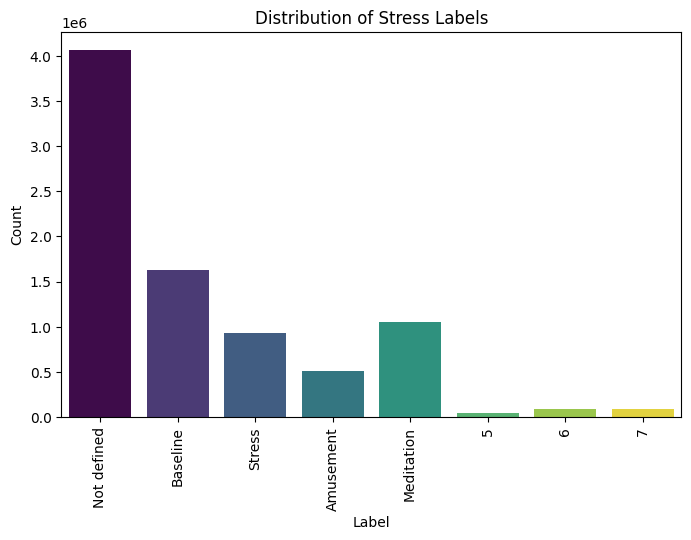

In [16]:
label_mapping = {
    0: "Not defined",
    1: "Baseline",
    2: "Stress",
    3: "Amusement",
    4: "Meditation",
    5: "5",
    6: "6",
    7: "7"
}

plt.figure(figsize=(8, 5))

sns.countplot(x=df["Labels"], hue=df["Labels"], palette="viridis", legend=False)

plt.xticks(ticks=list(label_mapping.keys()), labels=list(label_mapping.values()), rotation=90)

plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Stress Labels")

plt.show()

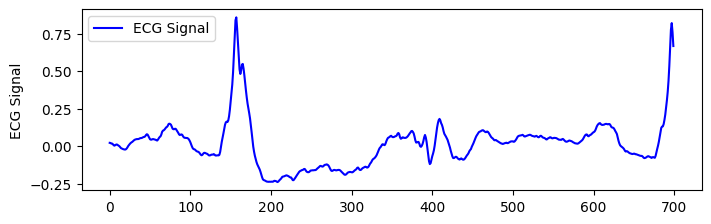

In [17]:
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(df["ECG Signal"][:700], label="ECG Signal", color="blue")
plt.ylabel("ECG Signal")
plt.legend()

In [18]:
df=df.copy()

In [19]:
df = df[df["Labels"].isin([1, 2, 3,4])]
df["Labels"].value_counts()

,count
Labels,
1,1627386
4,1049195
2,936538
3,513741


In [20]:
df['Labels'] = df['Labels'].apply(lambda x: 1 if x == 2 else 0)
df["Labels"].value_counts()

,count
Labels,
0,3190322
1,936538


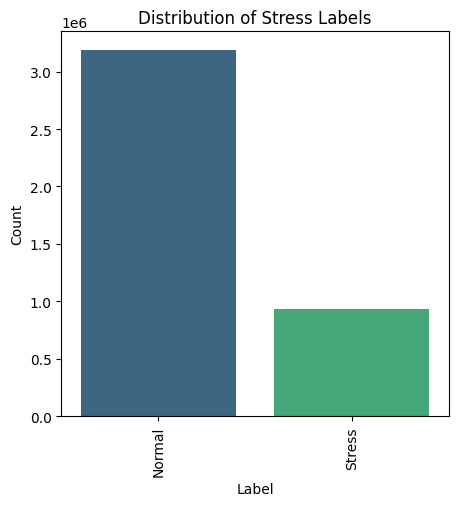

In [21]:
label_mapping = {
    0: "Normal",
    1: "Stress",

}

plt.figure(figsize=(5, 5))
sns.countplot(x=df["Labels"], hue=df["Labels"], palette="viridis", legend=False)

plt.xticks(ticks=list(label_mapping.keys()), labels=list(label_mapping.values()), rotation=90)

plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Stress Labels")

plt.show()

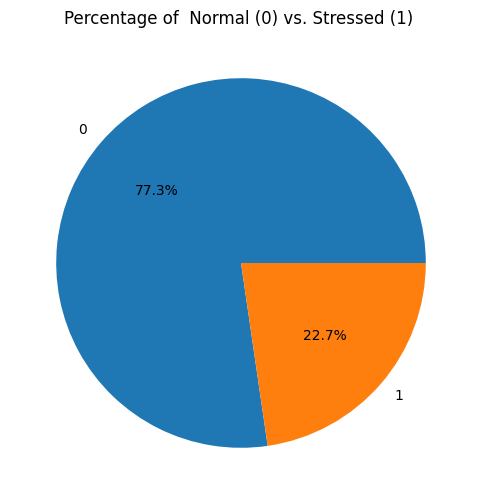

In [22]:
label_counts = df["Labels"].value_counts()
label_percentages = (label_counts / label_counts.sum()) * 100
plt.figure(figsize=(6, 6))
plt.pie(label_percentages, labels=label_percentages.index, autopct="%1.1f%%")
plt.title("Percentage of  Normal (0) vs. Stressed (1) ")
plt.show()

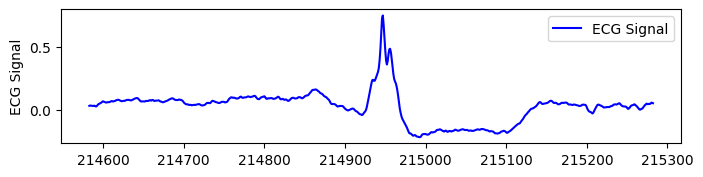

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(4, 1, 1)
plt.plot(df["ECG Signal"][:700], label="ECG Signal", color="blue")
plt.ylabel("ECG Signal")
plt.legend()


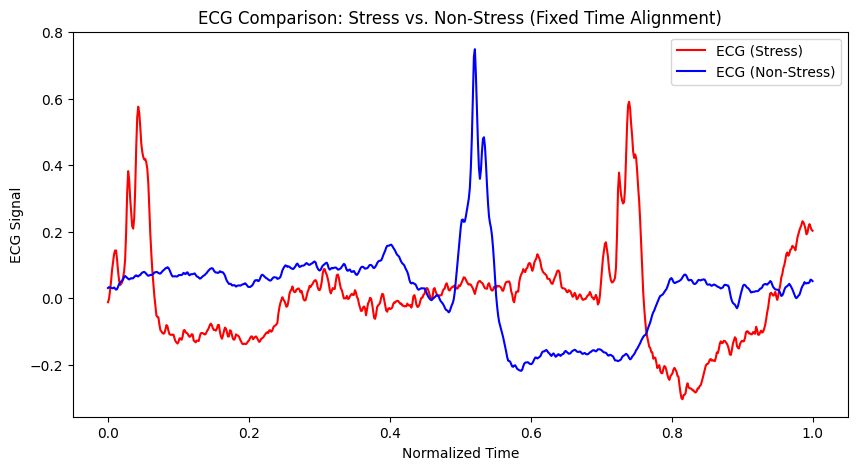

In [24]:
df_stress = df[df["Labels"] == 1]
df_non_stress = df[df["Labels"] == 0]
n_samples = 700
stress_ecg = df_stress["ECG Signal"].values[:n_samples]
non_stress_ecg = df_non_stress["ECG Signal"].values[:n_samples]

time = np.linspace(0, 1, n_samples)

plt.figure(figsize=(10, 5))
plt.plot(time, stress_ecg, label="ECG (Stress)", color="red")
plt.plot(time, non_stress_ecg, label="ECG (Non-Stress)", color="blue")
plt.legend()
plt.xlabel("Normalized Time")
plt.ylabel("ECG Signal")
plt.title("ECG Comparison: Stress vs. Non-Stress (Fixed Time Alignment)")
plt.show()

In [25]:
X = df[['ECG Signal']]
y = df['Labels']

In [26]:
def windows(df, window_size=3500, overlap=0.5, sampling_freq=700):
    X, y = [], []

    step_size = int(window_size * (1 - overlap))

    sub_data = df[['ECG Signal']].values
    labels = df['Labels'].values

    for i in range(0, len(sub_data) - window_size + 1, step_size):
            X.append(sub_data[i:i + window_size])
            y.append(np.bincount(labels[i:i + window_size]).argmax())

    return np.array(X), np.array(y)

In [27]:
X, y = windows(df, window_size=3500, overlap=0.5, sampling_freq=700)


In [28]:
DF = pd.DataFrame({'X': list(X), 'y': y})
DF


,X,y
0,"[[0.03094482421875], [0.0336456298828125], [0....",0
1,"[[0.0492095947265625], [0.0534210205078125], [...",0
2,"[[0.15838623046875], [0.1670379638671875], [0....",0
3,"[[0.0256805419921875], [0.0274200439453125], [...",0
4,"[[0.07342529296875], [0.0699005126953125], [0....",0
...,...,...
2352,"[[0.02288818359375], [0.02655029296875], [0.02...",0
2353,"[[0.0468292236328125], [0.04193115234375], [0....",0
2354,"[[0.04046630859375], [0.0424346923828125], [0....",0
2355,"[[-0.0738372802734375], [-0.0714569091796875],...",0


In [29]:
DF['y'].value_counts()

,count
y,
0,1822
1,535


In [30]:
timesteps = X.shape[1]  # 3500 (window size)
features = X.shape[2]
X = X.reshape(X.shape[0], -1)


In [31]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter


In [32]:
count_1 = sum(y == 1)
target_0 = int(count_1 * 1.5)

rus = RandomUnderSampler(sampling_strategy={0: target_0, 1: count_1}, random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print("undersampling:", Counter(y_rus))

undersampling: Counter({0: 802, 1: 535})


In [33]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_rus, y_rus)

print("SMOTE:", Counter(y_balanced))

SMOTE: Counter({0: 802, 1: 802})


In [34]:
DF = pd.DataFrame({'X_balanced': list(X_balanced), 'y_balanced': y_balanced})
DF


,X_balanced,y_balanced
0,"[0.0080108642578125, 0.0042572021484375, 0.008...",0
1,"[0.2010955810546875, 0.214324951171875, 0.2213...",0
2,"[-0.0003204345703125, -0.0012359619140625, -0....",0
3,"[-0.004119873046875, -0.0022430419921875, -0.0...",0
4,"[-0.035614013671875, -0.0403289794921875, -0.0...",0
...,...,...
1599,"[0.015912463247065498, 0.0171309888486357, 0.0...",1
1600,"[-0.08073273427103297, -0.06902543887977058, -...",1
1601,"[-0.024885884981779773, -0.029237491857408017,...",1
1602,"[0.004884198204382746, 0.011410332116282736, 0...",1


In [35]:
DF['y_balanced'].value_counts()

,count
y_balanced,
0,802
1,802


In [36]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 23.9 MB/s eta 0:00:00


In [37]:
import neurokit2 as nk
from scipy.signal import find_peaks

In [38]:
processed_signals = []
for signal in DF['X_balanced']:
    cleaned = nk.ecg_clean(signal, sampling_rate=700)
    processed_signals.append(cleaned)

DF['processed_ecg'] = processed_signals


In [39]:
DF

,X_balanced,y_balanced,processed_ecg
0,"[0.0080108642578125, 0.0042572021484375, 0.008...",0,"[0.015047699581565528, 0.01673841739277208, 0...."
1,"[0.2010955810546875, 0.214324951171875, 0.2213...",0,"[0.1512087587448263, 0.15882613382459904, 0.16..."
2,"[-0.0003204345703125, -0.0012359619140625, -0....",0,"[0.002364450640577733, 0.0019942438286007164, ..."
3,"[-0.004119873046875, -0.0022430419921875, -0.0...",0,"[-0.008001008042039605, -0.006868593774827557,..."
4,"[-0.035614013671875, -0.0403289794921875, -0.0...",0,"[0.008032770482528895, 0.009930479154195817, 0..."
...,...,...,...
1599,"[0.015912463247065498, 0.0171309888486357, 0.0...",1,"[0.0007618485659799515, -0.0003533086074393430..."
1600,"[-0.08073273427103297, -0.06902543887977058, -...",1,"[0.024930559211871685, 0.03535068682760381, 0...."
1601,"[-0.024885884981779773, -0.029237491857408017,...",1,"[-0.006805520068390522, -0.007158026181286929,..."
1602,"[0.004884198204382746, 0.011410332116282736, 0...",1,"[0.017630240005809324, 0.020620165084832203, 0..."


In [40]:
peaks = []
for signal in DF['processed_ecg']:
  peak_indices= find_peaks(signal)
  peaks.append(peak_indices)

DF['peaks'] = peaks
DF

,X_balanced,y_balanced,processed_ecg,peaks
0,"[0.0080108642578125, 0.0042572021484375, 0.008...",0,"[0.015047699581565528, 0.01673841739277208, 0....","([33, 77, 108, 191, 240, 283, 338, 387, 487, 5..."
1,"[0.2010955810546875, 0.214324951171875, 0.2213...",0,"[0.1512087587448263, 0.15882613382459904, 0.16...","([25, 188, 378, 423, 464, 657, 824, 852, 1112,..."
2,"[-0.0003204345703125, -0.0012359619140625, -0....",0,"[0.002364450640577733, 0.0019942438286007164, ...","([86, 174, 265, 379, 449, 468, 511, 566, 572, ..."
3,"[-0.004119873046875, -0.0022430419921875, -0.0...",0,"[-0.008001008042039605, -0.006868593774827557,...","([46, 65, 112, 144, 206, 267, 352, 418, 481, 5..."
4,"[-0.035614013671875, -0.0403289794921875, -0.0...",0,"[0.008032770482528895, 0.009930479154195817, 0...","([33, 93, 131, 164, 312, 397, 443, 513, 579, 6..."
...,...,...,...,...
1599,"[0.015912463247065498, 0.0171309888486357, 0.0...",1,"[0.0007618485659799515, -0.0003533086074393430...","([24, 97, 121, 137, 187, 216, 244, 285, 336, 3..."
1600,"[-0.08073273427103297, -0.06902543887977058, -...",1,"[0.024930559211871685, 0.03535068682760381, 0....","([40, 109, 201, 299, 413, 467, 559, 593, 662, ..."
1601,"[-0.024885884981779773, -0.029237491857408017,...",1,"[-0.006805520068390522, -0.007158026181286929,...","([27, 33, 67, 118, 151, 175, 233, 316, 428, 51..."
1602,"[0.004884198204382746, 0.011410332116282736, 0...",1,"[0.017630240005809324, 0.020620165084832203, 0...","([37, 85, 124, 198, 229, 330, 395, 415, 457, 4..."


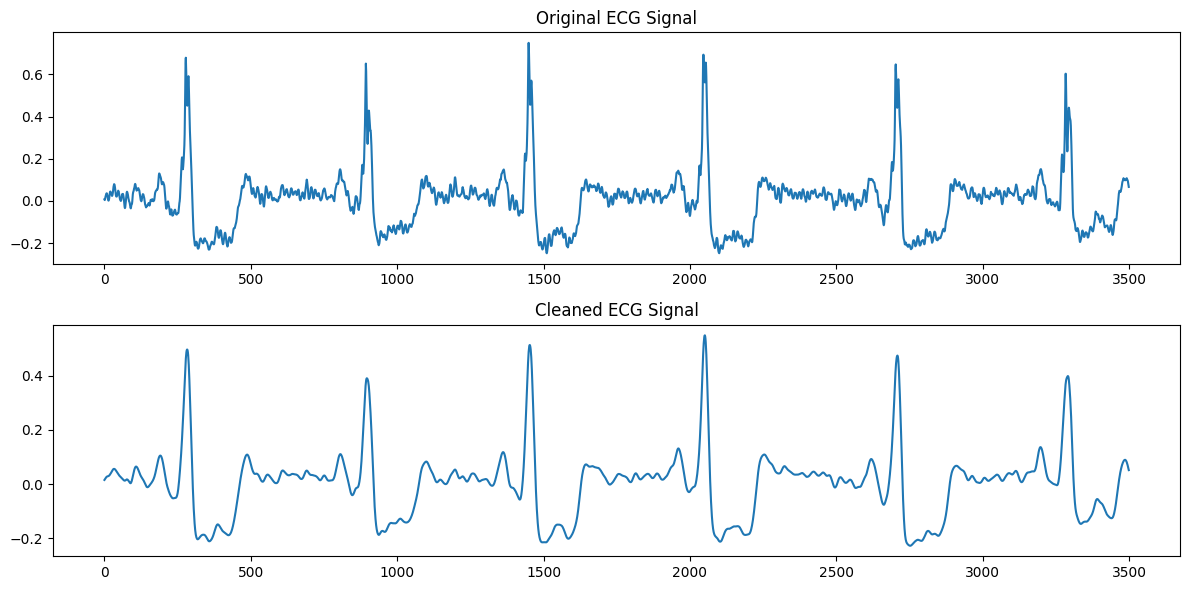

In [41]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(DF['X_balanced'][0])
plt.title('Original ECG Signal')

plt.subplot(2, 1, 2)
plt.plot(DF['processed_ecg'][0])
plt.title('Cleaned ECG Signal')

plt.tight_layout()
plt.show()


In [42]:
z= DF['processed_ecg']
f = DF['y_balanced']


In [43]:
from sklearn.model_selection import train_test_split


In [44]:
z_train, z_test, f_train, f_test = train_test_split(z, f, test_size=0.1, random_state=42 , shuffle=True)


In [45]:
len(z_train), len(f_test)


(1443, 161)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv2D, BatchNormalization, MaxPooling2D ,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense, Dropout

In [47]:
model = Sequential([
   Conv1D(64,  kernel_size=64, activation='relu', input_shape=(3500,1)),
   BatchNormalization(),
   MaxPooling1D(pool_size=(2)),
   Dropout(0.3),
   Conv1D(128, kernel_size=32, activation='relu'),
   BatchNormalization(),
   MaxPooling1D(pool_size=(2)),
   Dropout(0.3),

   Conv1D(256, kernel_size=32, activation='relu'),
   BatchNormalization(),
   MaxPooling1D(pool_size=(2)),
   Dropout(0.3),

   Conv1D(128, kernel_size=32, activation='relu'),
   BatchNormalization(),
   MaxPooling1D(pool_size=(2)),
   Dropout(0.3),

   Conv1D(128, kernel_size=32, activation='relu'),
   BatchNormalization(),
   MaxPooling1D(pool_size=(2)),
   Dropout(0.3),

   Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 3437, 64)            │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3437, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1718, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1718, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1687, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1687, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 843, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 843, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 812, 256)            │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 812, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 406, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 406, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 375, 128)            │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 375, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 187, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 187, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 156, 128)            │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 156, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 78, 128)             │              

 Total params: 4,169,409 (15.91 MB)

 Trainable params: 4,168,001 (15.90 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [50]:
z_train = np.stack(z_train).astype('float32')
z_test = np.stack(z_test).astype('float32')
z_train = z_train.reshape(z_train.shape[0], z_train.shape[1], 1)
z_test = z_test.reshape(z_test.shape[0], z_test.shape[1], 1)

In [51]:
history = model.fit( z_train, f_train,epochs=30,batch_size=16,
 validation_data=(z_test, f_test))

Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.7109 - loss: 1.3288 - val_accuracy: 0.5528 - val_loss: 2.7289
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8638 - loss: 0.6389 - val_accuracy: 0.5839 - val_loss: 2.2614
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8574 - loss: 0.5549 - val_accuracy: 0.6894 - val_loss: 1.2726
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8839 - loss: 0.3231 - val_accuracy: 0.7702 - val_loss: 0.5140
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8881 - loss: 0.3840 - val_accuracy: 0.9627 - val_loss: 0.1293
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9318 - loss: 0.1478 - val_accuracy: 0.9627 - val_loss: 0.1089
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9475 - loss: 0.1196 - val_accuracy: 0.9752 - val_loss: 0.0575
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9565 - loss: 0.1257 - val_accuracy: 0.9689 

In [52]:
test_loss, test_acc = model.evaluate(z_test, f_test)
print(f" Accuracy: {test_acc * 100:0.0f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9935 - loss: 0.0220
 Accuracy: 99%


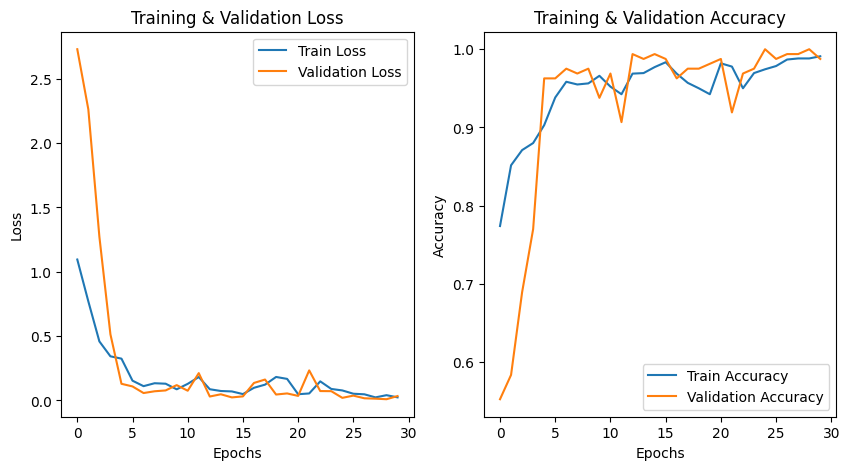

In [53]:
# Plot Training Loss & Accuracy
plt.figure(figsize=(10, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
y_pred = model.predict(z_test)
y_pred = (y_pred > 0.5).astype(int)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


In [56]:
print("Accuracy:", accuracy_score(f_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(f_test, y_pred))
print("Classification Report:\n", classification_report(f_test, y_pred))

Accuracy: 0.9875776397515528
Confusion Matrix:
 [[87  2]
 [ 0 72]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        89
           1       0.97      1.00      0.99        72

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



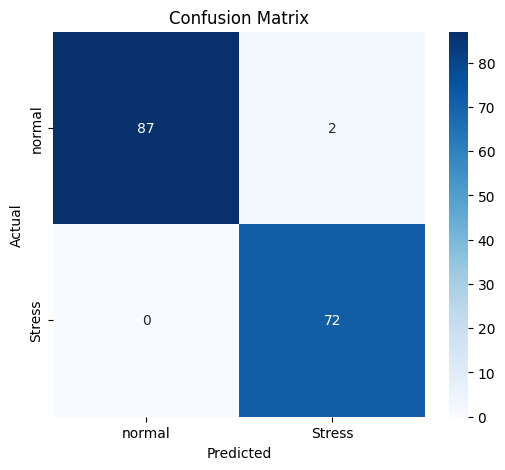

In [57]:
cm = confusion_matrix(f_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'Stress'],
            yticklabels=['normal', 'Stress'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()